<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#실습목표" data-toc-modified-id="실습목표-1">실습목표</a></span></li><li><span><a href="#0.-들어가며" data-toc-modified-id="0.-들어가며-2">0. 들어가며</a></span></li><li><span><a href="#1.-Data-PreProcess" data-toc-modified-id="1.-Data-PreProcess-3">1. Data PreProcess</a></span><ul class="toc-item"><li><span><a href="#1.1-Data-Load" data-toc-modified-id="1.1-Data-Load-3.1">1.1 Data Load</a></span></li><li><span><a href="#1.2-Session-Length" data-toc-modified-id="1.2-Session-Length-3.2">1.2 Session Length</a></span></li><li><span><a href="#1.3-Session-Time" data-toc-modified-id="1.3-Session-Time-3.3">1.3 Session Time</a></span></li><li><span><a href="#1.4-Data-Cleansing" data-toc-modified-id="1.4-Data-Cleansing-3.4">1.4 Data Cleansing</a></span></li><li><span><a href="#1.5-Train/-Valid/-Test-split" data-toc-modified-id="1.5-Train/-Valid/-Test-split-3.5">1.5 Train/ Valid/ Test split</a></span></li></ul></li><li><span><a href="#2.-논문-소개-(GRU4Rec)" data-toc-modified-id="2.-논문-소개-(GRU4Rec)-4">2. 논문 소개 (GRU4Rec)</a></span></li><li><span><a href="#3.-Data-Pipeline" data-toc-modified-id="3.-Data-Pipeline-5">3. Data Pipeline</a></span><ul class="toc-item"><li><span><a href="#3.1-SessionDataset" data-toc-modified-id="3.1-SessionDataset-5.1">3.1 SessionDataset</a></span></li><li><span><a href="#3.2-SessionDataLoader" data-toc-modified-id="3.2-SessionDataLoader-5.2">3.2 SessionDataLoader</a></span></li></ul></li><li><span><a href="#4.-Evaluation-Metric" data-toc-modified-id="4.-Evaluation-Metric-6">4. Evaluation Metric</a></span></li><li><span><a href="#5.-Modeling" data-toc-modified-id="5.-Modeling-7">5. Modeling</a></span><ul class="toc-item"><li><span><a href="#5.1-Model-Architecture" data-toc-modified-id="5.1-Model-Architecture-7.1">5.1 Model Architecture</a></span></li><li><span><a href="#5.2-Model-Training" data-toc-modified-id="5.2-Model-Training-7.2">5.2 Model Training</a></span></li></ul></li><li><span><a href="#5.-Inference" data-toc-modified-id="5.-Inference-8">5. Inference</a></span></li><li><span><a href="#6.-다른-데이터셋-활용" data-toc-modified-id="6.-다른-데이터셋-활용-9">6. 다른 데이터셋 활용</a></span></li><li><span><a href="#7.-관련-자료-소개" data-toc-modified-id="7.-관련-자료-소개-10">7. 관련 자료 소개</a></span></li></ul></div>

**노드에서 설명하지 않은 것들** <br>
- tensorflow, [pathlib](https://bit.ly/2FEVbLo), 딥러닝 기본(optimizer, loss), RNN, [iterator](https://dojang.io/mod/page/view.php?id=2405) <br>
- 코드 가독성을 위해 data type을 함수에 표시해둔 게 있음. 읽는법 안내가 필요.<br>
- 데이터가 7z 확장자로 압축되어 있음. 다운로드 및 압축푸는 과정은 생략함.<br>
- 논문에서는 loss, sampling 방법들에 대한 연구가 더 있는데 이 노드에서는 생략함.

**참고사항**
- 사람에 따라서 [논문](https://arxiv.org/pdf/1511.06939v4.pdf)을 먼저 읽는 것도 좋아보임. <br>
- [코드출처](https://github.com/paxcema/KerasGRU4Rec). 이 레포를 만든 사람도 전처리 부분은 다른 사람걸 참조함. <br> 
- 이 코드를 많이 리팩토링 함. 노드에 쓰여있는 코드는 이쪽 [레포](https://github.com/ZiminPark/SeqRecSys)에서 확인할 수 있음.
- 모델 학습에 시간이 좀 걸릴 수 있음.
- tqdm bar의 step이 딱 맞지 않고 몇 칸 부족한데 이유를 못찾겠음. <- 성능에 영향은 없어서 일단 두기로.

# 실습목표

> 1. Session의 개념을 익힌다.
> 2. Session Based Recommendation의 문제 정의를 익힌다. (+ Sequential Recommendation)
> 3. Session Based Recommendation Task에서 데이터 전처리를 할 때 고려해야할 요소들을 생각해 본다.
> 4. GRU4Rec 모델을 사용해본다.
> 5. 추천 시스템에서 사용하는 Evaluation Metric을 익힌다.

# 0. 들어가며

- ![aladin](./asset/aladin.png)

- 며칠 전 온라인 서점 ['알라딘'](https://www.aladin.co.kr/home/welcome.aspx)에 들어가 책을 구경하고 있었습니다. 개인정보를 남기고 싶지 않아 시크릿모드를 열고 로그인을 하지 않은 상태로 돌아다녔지요. 그런데 웬걸 제가 클릭한 책들이 *오늘 본 상품*에 기록되고 있었고 책 상세페이지에 다른 책들을 추천하고 있었습니다.

- ![amazon](./asset/amazon.png)

- [아마존](https://www.amazon.com/) 역시 마찬가지입니다. 시크릿모드를 켜놓고 캠을 사기위해 이것저것 서핑하고 보니 탐색 내역과 이를 바탕으로 한 추천을 해주고 있습니다.

- 인터넷에서 물건 많이 사시나요? 오늘은 전자상거래 플랫폼에서 많이 사용하고 있는 Session-Based Recommendation을 알아보겠습니다.
- Session-Based Recommendation은 말 그대로 세션 데이터를 기반으로 유저가 다음에 클릭 또는 구매할 아이템을 예측하는 추천을 말합니다.
- Session이란 앞에서 살펴보았듯이 유저가 서비스를 이용하면서 발생하는 중요한 정보를 담은 데이터를 말하고 서버 쪽에 저장됩니다.
- 유저의 행동 데이터들은 유저측 브라우저를 통해 쿠키의 형태로 저장되는데 쿠키는 세션과 상호작용하면서 정보를 주고 받습니다.
- 이번 자료에서는 세션을 **브라우저가 종료되기 전까지 유저의 행동을 담은 시퀀스 데이터**와 같은 의미로 사용하겠습니다. 자세한 내용은 참고자료를 확인해주세요. <br>

<span style="color:red">참고자료</span>

1. [쿠키, 세션, 캐시가 뭔가요?](https://www.youtube.com/watch?v=OpoVuwxGRDI&ab_channel=%EC%96%84%ED%8C%8D%ED%95%9C%EC%BD%94%EB%94%A9%EC%82%AC%EC%A0%84)
2. [쿠키, 세션이란?](https://medium.com/@chrisjune_13837/web-%EC%BF%A0%ED%82%A4-%EC%84%B8%EC%85%98%EC%9D%B4%EB%9E%80-aa6bcb327582)

- 아래와 같은 데이터가 예시입니다.
- **9194111** Session이 4개의 아이템(**214853420** **214850942** **214829878** **214853420**)을 본 상황입니다. 
- 유저가 **214853420** 아이템을 보았을 때 **214850942** 을 추천하고 이어서 **214850942** 보았을 때 **214829878**을 추천하고 싶습니다.
![amazon](./asset/session.png)

- 추천 시스템을 주로 다루는 학회 RecSys에서는 매년 추천을 주제로 대회를 엽니다. 15년도에는 [YOOCHOOSE](https://www.yoochoose.com/)라는 추천 엔진 솔루션 회사에서 [E-Commerce 데이터](https://2015.recsyschallenge.com/challenge.html)를 공개했습니다. 오늘은 이 데이터를 활용하겠습니다.

- [quiz] 노드에 시작하기 앞서 데이터를 살펴보고 알고 싶은 정보를 생각해봅시다.

- 데이터 설명을 읽어보면 몇 가지 주목할만한 점이 있습니다. 
    1. 유저에 대한 정보를 전혀 알 수 없습니다. 성별, 나이, 장소, 마지막 접속 날짜, 이전 구매 내역 등등
    2. 아이템에 대한 정보도 전혀 알 수 없습니다. 실제로 어떤 물건인지, 사진이나 설명, 가격

- 이와 달리 유저에 대한 정보를 알 수 있는 경우는 보통 Sequential Recommendation 이라고 구별해서 부르기도 합니다.
- 유저와 아이템의 추가 정보를 Sequential Recommendation 모델에 적용하는 분야는 Context-Aware 라는 키워드로 활발히 연구되고 있습니다.

- 또한 E-Commerce 데이터의 경우 다음과 같은 특징을 갖는다고 합니다.(저도 E-Commerce 회사에 다녀본 적은 없습니다.)
    1. 비로그인 상태로 탐색하는 유저가 많습니다.
    2. 로그인 상태로 탐색한다고 할지라도 접속할 때 마다 탐색하는 의도가 뚜렷하게 다릅니다.<br>
    즉, 마우스를 사야겠다고 마음먹고 탐색한 이력이 칫솔을 사야겠다 생각하고 탐색하는 경우에 도움이 되지 않습니다.

# 1. Data PreProcess

## 1.1 Data Load

- 데이터를 불러와 살펴보고 주요 통계치들을 살펴봅시다.
- 이번 자료에서는 Click 데이터에 있는 Session Id, TimeStamp, ItemId 칼럼만 사용하겠습니다.

In [1]:
import datetime as dt
from pathlib import Path

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
# pathlib 라이브러리에 대한 내용은 https://bit.ly/2FEVbLo 이쪽을 참고해주세요.
data_path = Path('/Users/zimin/Downloads/archive/')  # 'D:\\data\\yoochoose-data\\'
train_path = data_path / 'yoochoose-clicks.dat'

In [3]:
def load_data(data_path: Path, nrows=None):
    data = pd.read_csv(data_path, sep=',', header=None, usecols=[0, 1, 2],
                       parse_dates=[1], dtype={0: np.int32, 2: np.int32}, nrows=nrows)
    data.columns = ['SessionId', 'Time', 'ItemId']
    return data

In [4]:
data = load_data(train_path, None)
data.sort_values(['SessionId', 'Time'], inplace=True)  # data를 id와 시간 순서로 정렬해줍니다.
data

,SessionId,Time,ItemId
0,1,2014-04-07 10:51:09.277000+00:00,214536502
1,1,2014-04-07 10:54:09.868000+00:00,214536500
2,1,2014-04-07 10:54:46.998000+00:00,214536506
3,1,2014-04-07 10:57:00.306000+00:00,214577561
4,2,2014-04-07 13:56:37.614000+00:00,214662742
...,...,...,...
32230487,11562158,2014-09-26 04:50:29.172000+00:00,214849132
32230488,11562158,2014-09-26 04:52:21.900000+00:00,214854774
32230489,11562158,2014-09-26 05:16:32.904000+00:00,214849132
32230490,11562159,2014-09-26 19:16:28.897000+00:00,214849132


- 추천시스템을 구축할 때 가장 먼저 확인해 볼 것은 유저수(세션 수)와 아이템 수 입니다.

In [5]:
data['SessionId'].nunique(), data['ItemId'].nunique()

(9249729, 52739)

- 세션의 숫자가 900만개, 아이템 숫자는 5만개가 됩니다.
- 이 수치가 유저의 수가 900만명이라는 것은 아닙니다. 같은 유저가 여러 개의 세션을 만들수도 있기 때문입니다.

## 1.2 Session Length

- 각 세션이 대략 몇 개의 클릭 데이터를 갖는지도 살펴보겠습니다.

In [6]:
session_length = data.groupby('SessionId').size()

In [7]:
session_length.median(), session_length.mean()

(2.0, 3.568098481587947)

In [8]:
session_length.min(), session_length.max()

(1, 200)

In [9]:
session_length.quantile(0.999)

41.0

- 각 세션의 길이는 보통 2~3 정도입니다. 온라인에서 쇼핑할 때를 생각해보면 이 수치가 그럴듯하게 느껴집니다.
- 99.9% 세션은 길이가 41이하입니다. 
- 길이가 200인 세션은 뭔가 이상합니다. 하나를 잡고 살펴봅시다.

In [10]:
long_session = session_length[session_length==200].index[0]
data[data['SessionId']==long_session]

,SessionId,Time,ItemId
580293,189448,2014-04-01 08:56:28.983000+00:00,214830392
580294,189448,2014-04-01 08:56:31.815000+00:00,214830392
580295,189448,2014-04-01 08:57:08.301000+00:00,214830392
580296,189448,2014-04-01 08:57:10.338000+00:00,214830392
580297,189448,2014-04-01 08:58:01.728000+00:00,214830390
...,...,...,...
580488,189448,2014-04-01 10:35:52.400000+00:00,214830137
580489,189448,2014-04-01 10:37:15.094000+00:00,214830118
580490,189448,2014-04-01 10:37:35.955000+00:00,214830118
580491,189448,2014-04-01 10:37:37.098000+00:00,214830118


- 매우 짧은 간격으로 지속적으로 클릭을 1시간 30분 가량 지속하고 있습니다.
- 유저들의 서비스 이용행태는 다양하기 때문에 데이터 전처리를 어떻게 할지는 모델을 만드는 사람이 판단해야 합니다.<br>
    e.g.) 음악 데이터의 경우 어떤 사람은 하루종일 랜덤재생을 할 수도 있습니다. 이 유저의 데이터를 그대로 사용하는 게 좋을까요?<br>
    e.g.) 어떤 상품의 경우 1분 내에 20명이 10점을 주고 나갈 수도 있습니다. 이 상품을 팔기 위해 조작하고 있는 건 아닐까요?
- 너무 긴 세션을 제거할 수도 있고 포함시킬 수도 있습니다. 어떻게 하면 좋을지 판단해보세요.

- 세션 길이에 대한 감을 더 잘 파악하기 위해 시각화를 해보겠습니다.

In [11]:
length_count = session_length.groupby(session_length).size()
length_percent_cumsum = length_count.cumsum() / length_count.sum()
length_percent_cumsum_999 = length_percent_cumsum[length_percent_cumsum < 0.999]

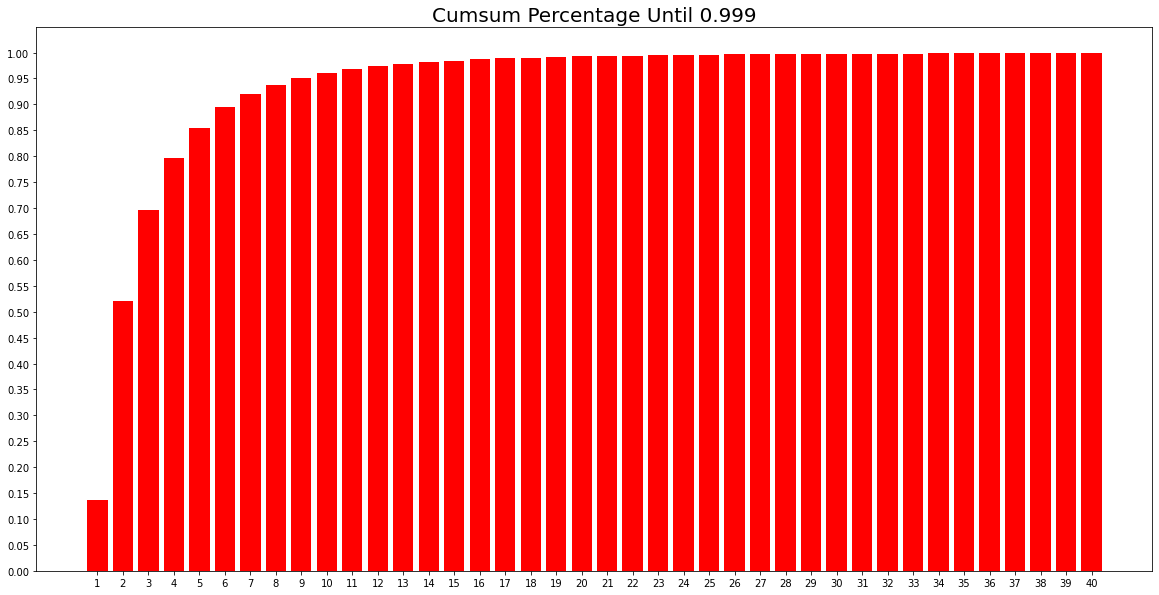

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.bar(x=length_percent_cumsum_999.index,
        height=length_percent_cumsum_999, color='red')
plt.xticks(length_percent_cumsum_999.index)
plt.yticks(np.arange(0, 1.01, 0.05))
plt.title('Cumsum Percentage Until 0.999', size=20)
plt.show()

[quiz] 이 데이터에 Matrix Factorization을 사용하면 어떨까요? <br>
- User * Item Matrix의 빈칸이 너무 많아서(data sparsity) 모델이 제대로 학습되지 않을 가능성이 있다.

## 1.3 Session Time

- 어떤 유저가 아이폰을 구매하려고 합니다. 2020년 10월에는 아이폰12를 구매하려는 사람이 많을 것입니다.
- 5개월 전에는 어땠을까요? 아이폰 SE2를 구매하려는 사람이 많았을 것입니다.
- 영화나 드라마 역시 마찬가지입니다. 유저들의 소비 패턴을 금방금방 변합니다.
- 이런 이유 때문에 추천시스템을 구축할 때에는 최근 소비 트렌드를 학습하는 것이 중요합니다. 이번에는 데이터가 발생한 시간에 대해 알아봅시다.
- [quiz] 추천 시스템에서 다루는 시간 관련 데이터는 다양한 측면이 있습니다. 데이터 생성 날짜 말고 또 어떤 요소가 있을까요?
    - 접속하는 시간대(오전, 오후, 새벽), 접속해 있는 시간, 접속하는 요일, 계절, 마지막 접속 시간, 장바구니에 넣고 지난 시간 등등

In [13]:
oldest, latest = data['Time'].min(), data['Time'].max()
print(oldest) 
print(latest)

2014-04-01 03:00:00.124000+00:00
2014-09-30 02:59:59.430000+00:00


- 데이터 설명대로 6개월치 데이터가 있습니다.
- 저는 1달치 데이터만 사용하려고 합니다. 6개월치 데이터를 사용하면 성능이 더 좋아질까요?

In [14]:
type(latest)

pandas._libs.tslibs.timestamps.Timestamp

- latest는 Timestamp 객체이기 때문에 int 객체와의 사칙연산을 지원하지 않습니다.
- 날짜끼리의 차이를 구하고 싶을 때는 datetime 라이브러리의 timedelta 객체를 사용합니다.

In [15]:
month_ago = latest - dt.timedelta(30)
data = data[data['Time'] > month_ago]

In [16]:
data

,SessionId,Time,ItemId
26837834,9194111,2014-08-31 17:40:46.805000+00:00,214853420
26837835,9194111,2014-08-31 17:42:26.089000+00:00,214850942
26837836,9194111,2014-08-31 17:44:06.583000+00:00,214829878
26837837,9194111,2014-08-31 17:48:49.873000+00:00,214853420
26838214,9194112,2014-09-01 13:26:36.292000+00:00,214853422
...,...,...,...
32230487,11562158,2014-09-26 04:50:29.172000+00:00,214849132
32230488,11562158,2014-09-26 04:52:21.900000+00:00,214854774
32230489,11562158,2014-09-26 05:16:32.904000+00:00,214849132
32230490,11562159,2014-09-26 19:16:28.897000+00:00,214849132


## 1.4 Data Cleansing

- 1.2에서 살펴보니 길이가 1인 세션도 꽤 있습니다. 우리의 목적은 유저가 최소 1개 이상 클릭했을 때 다음 클릭을 예측하는 것이므로 길이가 1인 세션은 제거해줍니다.
- 너무 적게 클릭된 아이템은 이상한 아이템일 가능성이 있습니다. 이 역시 제거해줍니다.

In [17]:
# short_session을 제거한 다음 unpopular item을 제거하면 다시 길이가 1인 session이 생길 수 있습니다.
# 이를 위해 반복문을 통해 지속적으로 제거 합니다.
def cleanse_recursive(data: pd.DataFrame, shortest, least_click) -> pd.DataFrame:
    while True:
        before_len = len(data)
        data = cleanse_short_session(data, shortest)
        data = cleanse_unpopular_item(data, least_click)
        after_len = len(data)
        if before_len == after_len:
            break
    return data


def cleanse_short_session(data: pd.DataFrame, shortest):
    session_len = data.groupby('SessionId').size()
    session_use = session_len[session_len >= shortest].index
    data = data[data['SessionId'].isin(session_use)]
    return data


def cleanse_unpopular_item(data: pd.DataFrame, least_click):
    item_popular = data.groupby('ItemId').size()
    item_use = item_popular[item_popular >= least_click].index
    data = data[data['ItemId'].isin(item_use)]
    return data

In [18]:
data = cleanse_recursive(data, shortest=2, least_click=5)
data

,SessionId,Time,ItemId
26837834,9194111,2014-08-31 17:40:46.805000+00:00,214853420
26837835,9194111,2014-08-31 17:42:26.089000+00:00,214850942
26837836,9194111,2014-08-31 17:44:06.583000+00:00,214829878
26837837,9194111,2014-08-31 17:48:49.873000+00:00,214853420
26838202,9194123,2014-08-31 19:26:57.386000+00:00,214601207
...,...,...,...
32230485,11562157,2014-09-25 12:31:10.391000+00:00,214580372
32230486,11562157,2014-09-25 12:31:29.679000+00:00,214516012
32230487,11562158,2014-09-26 04:50:29.172000+00:00,214849132
32230488,11562158,2014-09-26 04:52:21.900000+00:00,214854774


## 1.5 Train/ Valid/ Test split

- 모델 평가를 위해 Valid Set과 Test Set을 만들어 봅니다.
- [quiz] 이전에는 어떤식으로 Train과 Valid를 나눴었나요?

- 대회에서 Test Set을 제공해주고 있습니다. 한 번 살펴봅시다.

In [19]:
test_path = data_path / 'yoochoose-test.dat'
test= load_data(test_path)
test['Time'].min(), test['Time'].max()

(Timestamp('2014-04-01 03:00:08.250000+0000', tz='UTC'),
 Timestamp('2014-09-30 02:59:23.866000+0000', tz='UTC'))

- Test 셋을 살펴보니 Training 셋과 기간이 겹칩니다.
- 하지만 1.3에서 말했듯이 추천 시스템은 `지금` 잘 예측하는 게 중요합니다. 
- 1달 전에 성능이 좋은 모델을 지금 쓰면 사용자들의 소비 패턴이 달라졌기 때문입니다.
- 이런 이유로 Session-Based Recommendation에서는 기간에 따라 Train/ Valid/ Test 셋을 나누기도 합니다. <br>
  이번 자료에서는 가장 마지막 1일 기간 동안을 Test로, 2일전부터 1일전 까지를 valid set으로 나누겠습니다.
 
![split](./asset/split.png)

In [20]:
def split_by_date(data: pd.DataFrame, n_days: int):
    final_time = data['Time'].max()
    session_last_time = data.groupby('SessionId')['Time'].max()
    session_in_train = session_last_time[session_last_time < final_time - dt.timedelta(n_days)].index
    session_in_test = session_last_time[session_last_time >= final_time - dt.timedelta(n_days)].index

    before_date = data[data['SessionId'].isin(session_in_train)]
    after_date = data[data['SessionId'].isin(session_in_test)]
    after_date = after_date[after_date['ItemId'].isin(before_date['ItemId'])]
    return before_date, after_date

In [21]:
tr, test = split_by_date(data, n_days=1)
tr, val = split_by_date(tr, n_days=1)

In [22]:
# data에 대한 정보를 살펴봅니다.
def stats_info(data: pd.DataFrame, status: str):
    print(f'* {status} Set Stats Info\n'
          f'\t Events: {len(data)}\n'
          f'\t Sessions: {data["SessionId"].nunique()}\n'
          f'\t Items: {data["ItemId"].nunique()}\n'
          f'\t First Time : {data["Time"].min()}\n'
          f'\t Last Time : {data["Time"].max()}\n')

In [23]:
stats_info(tr, 'train')
stats_info(val, 'valid')
stats_info(test, 'test')

* train Set Stats Info
	 Events: 5125100
	 Sessions: 1243431
	 Items: 20153
	 First Time : 2014-08-31 03:00:01.111000+00:00
	 Last Time : 2014-09-28 02:57:34.348000+00:00

* valid Set Stats Info
	 Events: 58074
	 Sessions: 12350
	 Items: 6232
	 First Time : 2014-09-28 03:00:25.298000+00:00
	 Last Time : 2014-09-29 02:58:27.660000+00:00

* test Set Stats Info
	 Events: 71009
	 Sessions: 15289
	 Items: 6580
	 First Time : 2014-09-29 02:37:20.695000+00:00
	 Last Time : 2014-09-30 02:59:59.430000+00:00



In [24]:
# train set에 없는 아이템이 val, test기간에 생길 수 있으므로 train data를 기준으로 인덱싱합니다.
id2idx = {item_id : index for index, item_id in enumerate(tr['ItemId'].unique())}

def indexing(df, id2idx):
    df['item_idx'] = df['ItemId'].map(lambda x: id2idx.get(x, -1))  # id2idx에 없는 아이템은 모르는 값(-1) 처리 해줍니다.
    return df

tr = indexing(tr, id2idx)
val = indexing(val, id2idx)
test = indexing(test, id2idx)

- 이제 데이터 준비를 마쳤습니다! 데이터를 저장한 다음 data pipeline을 구축하는 단계로 넘어가겠습니다.

In [25]:
save_path = data_path / 'processed'
save_path.mkdir(parents=True, exist_ok=True)

tr.to_pickle(save_path / 'train.pkl')
val.to_pickle(save_path / 'valid.pkl')
test.to_pickle(save_path / 'test.pkl')

# 2. 논문 소개 (GRU4Rec)

- 이번 자료에서 사용할 모델은 2016년 ICLR에 공개된 SESSION-BASED RECOMMENDATIONS WITH RECURRENT NEURAL NETWORKS ([링크](https://arxiv.org/pdf/1511.06939v4.pdf)) 입니다.
- Session Data에서는 처음으로 RNN 계열 모델을 적용하여 발표했습니다.
- 모델 구조는 아래 그림처럼 간단합니다. 
    - 여러 RNN 계열의 모델(e.g. LSTM)이 있겠지만 저자가 실험해본 결과 GRU의 성능이 제일 좋았다고 합니다.
    - 또한 Embedding Layer를 사용하지 않았을 때가 사용했을 때보다 성능이 좋았다고 합니다. 
    - 이번 자료에서도 Embedding Layer를 사용하지 않고 One-hot Encoding만 사용하겠습니다.
![model](./asset/model.png)

- 대신 추천 데이터의 특징 몇 가지를 살려 모델링을 했습니다. <br>
    1. **Session-Parallel Mini-Batches** : <br>
위에서 보았듯이 Session의 길이는 매우 짧은 것들이 대부분입니다. 그러나 매우 긴 것들도 있습니다.<br> 
이 세션들을 데이터 샘플 하나로 보고 mini-batch를 구성하여 input으로 넣는다면 길이가 제일 긴 세션의 연산이 끝날 때까지 짧은 세션들이 기다려야 합니다.<br>
![input1](./asset/input1.png) <br>
위 그림에서 Session 1,2,3을 하나의 mini-batch로 만든다면 이 미니배치의 연산은 Session 3의 연산이 끝나야 끝나는 식입니다.<br> 
논문의 저자는 대신 Session-Parallel Mini-Batches를 제안합니다. 이름처럼 Session이 끝날 때까지 기다리지 않고 병렬적으로 계산하자는 뜻입니다.<br>
아래 그림에서 session2가 끝나면 session4가 시작하는 방식입니다. <br>
이렇게 구성했을 때 Mini-Batch의 shape은 (3, 1, 1)이 되고 RNN cell의 state가 1개로만 이루어집니다. <br>
또한 Tensorflow 기준으로 RNN을 만들 때 stateful=True 옵션을 사용하고 2처럼 세션이 끝나면 state를 0으로 만들어 줍니다. [RNN API 보기](https://www.tensorflow.org/api_docs/python/tf/keras/layers/RNN) <br>
뒷부분에서 이 부분에 대한 코딩을 어떻게 했는지 봅시다. <br>
![input2](./asset/input2.png) <br>

2. **SAMPLING ON THE OUTPUT** :
    - Negative Sampling와 같은 개념입니다. Item의 수가 많기 때문에 Loss를 계산할 때 모든 아이템을 비교하지 않고 인기도를 고려하여 Sampling합니다. 이번 자료에서는 구현하지 않았습니다.

3. **RANKING LOSS** :
    - Session-Based Recommendation Task를 여러 아이템 중 다음 아이템이 무엇인지 Classification하는 Task로 생각할 수도 있습니다.
    - 그러나 여러 아이템을 관련도 순으로 랭킹을 매겨서 높은 랭킹의 아이템을 추천하는 Task로도 생각할 수 있습니다.
    - 추천 시스템 연구 분야에서는 이렇게 Ranking을 맞추는 objective function에 대한 연구가 있었고 논문의 저자 역시 이런 Loss를 사용했습니다.
    - 그러나 이번 자료에서는 Classification Task로 보고 Cross-Entropy Loss를 사용하겠습니다.
    
2, 3에 대한 자세한 내용은 [논문](https://arxiv.org/pdf/1511.06939v4.pdf)을 참고해주세요.

# 3. Data Pipeline

- Session-Parrarel Mini-Batch 를 구현해봅니다.

## 3.1 SessionDataset

- 데이터가 주어지면 세션이 시작되는 인덱스를 담는 값과 세션을 새로 인덱싱한 값을 갖는 클래스를 만듭니다.

In [26]:
class SessionDataset:
    """Credit to yhs-968/pyGRU4REC."""

    def __init__(self, data):
        self.df = data
        self.click_offsets = self.get_click_offsets()
        self.session_idx = np.arange(self.df['SessionId'].nunique())  # indexing to SessionId

    def get_click_offsets(self):
        """
        Return the indexes of the first click of each session IDs,
        """
        offsets = np.zeros(self.df['SessionId'].nunique() + 1, dtype=np.int32)
        offsets[1:] = self.df.groupby('SessionId').size().cumsum()
        return offsets

- train데이터로 SessionDataset 객체를 만들고 인스턴스 변수들을 살펴보겠습니다.
- `click_offsets` 변수는 각 세션이 시작된 인덱스를 담고 있습니다.
- `session_idx` 변수는 각 세션을 인덱싱한 np.array 입니다.

In [27]:
tr_dataset = SessionDataset(tr)
tr_dataset.df.head(10)

,SessionId,Time,ItemId,item_idx
26837834,9194111,2014-08-31 17:40:46.805000+00:00,214853420,0
26837835,9194111,2014-08-31 17:42:26.089000+00:00,214850942,1
26837836,9194111,2014-08-31 17:44:06.583000+00:00,214829878,2
26837837,9194111,2014-08-31 17:48:49.873000+00:00,214853420,0
26838202,9194123,2014-08-31 19:26:57.386000+00:00,214601207,3
26838203,9194123,2014-08-31 19:34:37.068000+00:00,214510689,4
26838193,9194124,2014-08-31 19:14:28.308000+00:00,214849327,5
26838194,9194124,2014-08-31 19:16:31.114000+00:00,214828970,6
26838196,9194127,2014-09-01 15:36:11.651000+00:00,214845997,7
26838197,9194127,2014-09-01 15:38:00.222000+00:00,214845997,7


In [28]:
tr_dataset.click_offsets

array([      0,       4,       6, ..., 5125095, 5125097, 5125100],
      dtype=int32)

In [29]:
tr_dataset.session_idx

array([      0,       1,       2, ..., 1243428, 1243429, 1243430])

## 3.2 SessionDataLoader

- python 문법 중 iterator, generator를 모르시는 분은 이 [자료](https://dojang.io/mod/page/view.php?id=2405)를 먼저 보시길 권장합니다.

- SessionDataset 객체를 받아서 Session-Parallel mini-batch를 만드는 클래스를 만듭니다.
- `__iter__` 메소드는 모델 인풋, 라벨, 세션이 끝나는 곳의 위치를 yield합니다.
- mask는 후에 RNN Cell State를 초기화 하는데 사용할 것입니다.

In [30]:
class SessionDataLoader:
    """Credit to yhs-968/pyGRU4REC."""

    def __init__(self, dataset: SessionDataset, batch_size=50):
        self.dataset = dataset
        self.batch_size = batch_size

    def __iter__(self):
        """ Returns the iterator for producing session-parallel training mini-batches.
        Yields:
            input (B,):  Item indices that will be encoded as one-hot vectors later.
            target (B,): a Variable that stores the target item indices
            masks: Numpy array indicating the positions of the sessions to be terminated
        """

        start, end, mask, last_session, finished = self.initialize()  # initialize 메소드에서 확인해주세요.
        """
        start : Index Where Session Start
        end : Index Where Session End
        mask : indicator for the sessions to be terminated
        """

        while not finished:
            min_len = (end - start).min() - 1  # Shortest Length Among Sessions
            for i in range(min_len):
                # Build inputs & targets
                inp = self.dataset.df['item_idx'].values[start + i]
                target = self.dataset.df['item_idx'].values[start + i + 1]
                yield inp, target, mask

            start, end, mask, last_session, finished = self.update_status(start, end, min_len, last_session, finished)

    def initialize(self):
        first_iters = np.arange(self.batch_size)  # 첫 배치에 사용할 세션 Index를 가져옵니다.
        last_session = self.batch_size - 1  # 마지막으로 다루고 있는 세션 Index를 저장해둡니다.
        start = self.dataset.click_offsets[self.dataset.session_idx[first_iters]]  # data 상에서 session이 시작된 위치를 가져옵니다.
        end = self.dataset.click_offsets[self.dataset.session_idx[first_iters] + 1]  # session이 끝난 위치 바로 다음 위치를 가져옵니다.
        mask = np.array([])  # session의 모든 아이템을 다 돌은 경우 mask에 추가해줄 것입니다.
        finished = False  # data를 전부 돌았는지 기록하기 위한 변수입니다.
        return start, end, mask, last_session, finished

    def update_status(self, start: np.ndarray, end: np.ndarray, min_len: int, last_session: int, finished: bool):  
        # 다음 배치 데이터를 생성하기 위해 상태를 update합니다.
        
        start += min_len  # __iter__에서 min_len 만큼 for문을 돌았으므로 start를 min_len 만큼 더해줍니다.
        mask = np.arange(self.batch_size)[(end - start) == 1]  
        # end는 다음 세션이 시작되는 위치인데 start와 한 칸 차이난다는 것은 session이 끝났다는 뜻입니다. mask에 기록해줍니다.

        for i, idx in enumerate(mask, start=1): # mask에 추가된 세션 개수만큼 새로운 세션을 돌것입니다.
            new_session = last_session + i  
            if new_session > self.dataset.session_idx[-1]:  # 만약 새로운 세션이 마지막 세션 index보다 크다면 모든 학습데이터를 돈 것입니다.
                finished = True
                break
            # update the next starting/ending point
            start[idx] = self.dataset.click_offsets[self.dataset.session_idx[new_session]]  # 종료된 세션 대신 새로운 세션의 시작점을 기록합니다.
            end[idx] = self.dataset.click_offsets[self.dataset.session_idx[new_session] + 1]

        last_session += len(mask)  # 마지막 세션의 위치를 기록해둡니다.
        return start, end, mask, last_session, finished

In [31]:
tr_data_loader = SessionDataLoader(tr_dataset, batch_size=4)
tr_dataset.df.head(15)

,SessionId,Time,ItemId,item_idx
26837834,9194111,2014-08-31 17:40:46.805000+00:00,214853420,0
26837835,9194111,2014-08-31 17:42:26.089000+00:00,214850942,1
26837836,9194111,2014-08-31 17:44:06.583000+00:00,214829878,2
26837837,9194111,2014-08-31 17:48:49.873000+00:00,214853420,0
26838202,9194123,2014-08-31 19:26:57.386000+00:00,214601207,3
26838203,9194123,2014-08-31 19:34:37.068000+00:00,214510689,4
26838193,9194124,2014-08-31 19:14:28.308000+00:00,214849327,5
26838194,9194124,2014-08-31 19:16:31.114000+00:00,214828970,6
26838196,9194127,2014-09-01 15:36:11.651000+00:00,214845997,7
26838197,9194127,2014-09-01 15:38:00.222000+00:00,214845997,7


In [32]:
iter_ex = iter(tr_data_loader)

- 아래 셀을 반복 실행하면 next가 계속 다음 데이터를 만듭니다.
- input, output, mask의 감을 잡아 봅시다.

In [33]:
inputs, labels, mask =  next(iter_ex)
print(f'Model Input Item Idx are : {inputs}')
print(f'Label Item Idx are : {"":5} {labels}')
print(f'Previous Masked Input Idx are {mask}')

Model Input Item Idx are : [0 3 5 7]
Label Item Idx are :       [1 4 6 7]
Previous Masked Input Idx are []


# 4. Evaluation Metric

- 모델 성능 평가를 위한 지표를 보겠습니다.
- 이전에 정확도와 관련된 지표로 Precision이나 Recall을 보셨을 것입니다. (quiz 정의 알기)
- Session-Based Recommendation Task에서는 모델이 k개의 아이템을 제시했을 때 유저가 클릭/ 구매한 n개의 아이템이 많아야 좋습니다.
- 이 때문에 recall의 개념을 확장한 `recall`@k 지표, precision의 개념을 확장한 Mean Average `Precision`@k 지표 등을 사용합니다.
- 추천에서는 `몇 번째로` 맞추느냐도 중요합니다. 구글에서 검색했을 때 1페이지에 원하는 결과가 나오지 않고 2페이지에 나온다면 유저 반응이 크게 떨어질 것입니다.
- 따라서 순서에 민감한 지표인 `MRR`, `NDCG` 같은 지표도 사용합니다.
- 이번 자료에서는 `MRR`과 Recall@k를 사용하겠습니다. `MRR`은 정답 아이템이 나온 순번의 역수 값입니다. 
- 따라서 정답 아이템이 추천 결과 앞쪽 순번에 나온다면 지표가 높아질 것이고 뒤쪽에 나오거나 안나온다면 지표가 낮아질 것입니다. <br>
NDCG, MRR, MAP에 대한 자세한 설명은 [링크](https://medium.com/swlh/rank-aware-recsys-evaluation-metrics-5191bba16832)를 확인해주세요.

In [35]:
def mrr_k(pred, truth: int, k: int):
    indexing = np.where(pred[:k] == truth)[0]
    if len(indexing) > 0:
        return 1 / (indexing[0] + 1)
    else:
        return 0


def recall_k(pred, truth: int, k: int) -> int:
    answer = truth in pred[:k]
    return int(answer)

# 5. Modeling

## 5.1 Model Architecture

- 2에서 소개한 모델 구조를 구현하겠습니다. 
- 모델 구조가 간단한 편이므로 [Functional](https://www.tensorflow.org/guide/keras/functional?hl=en)하게 모델을 만들겠습니다.

- quiz 구조 바꿔서 성능이 어떻게 변하는지 시각화해보기, embedding 추가, layer 더 쌓기, negative sampling 구현, session-parallel batch 안쓰기 등등

In [36]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, GRU
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm

In [40]:
def create_model(args):
    inputs = Input(batch_shape=(args.batch_size, 1, args.num_items))
    gru, _ = GRU(args.hsz, stateful=True, return_state=True, name='GRU')(inputs)
    dropout = Dropout(args.drop_rate)(gru)
    predictions = Dense(args.num_items, activation='softmax')(dropout)
    model = Model(inputs=inputs, outputs=[predictions])
    model.compile(loss=categorical_crossentropy, optimizer=Adam(args.lr), metrics=['accuracy'])
    model.summary()
    return model

- 모델에 사용할 hyper-parameter를 class형식으로 관리하겠습니다.

In [41]:
class Args:
    def __init__(self, tr, val, test, batch_size, hsz, drop_rate, lr, epochs, k):
        self.tr = tr
        self.val = val
        self.test = test
        self.num_items = tr['ItemId'].nunique()
        self.num_sessions = tr['SessionId'].nunique()
        self.batch_size = batch_size
        self.hsz = hsz
        self.drop_rate = drop_rate
        self.lr = lr
        self.epochs = epochs
        self.k = k

args = Args(tr, val, test, batch_size=2048, hsz=50, drop_rate=0.1, lr=0.001, epochs=3, k=20)

In [42]:
model = create_model(args)

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(2048, 1, 20153)]        0         
_________________________________________________________________
GRU (GRU)                    [(2048, 50), (2048, 50)]  3030750   
_________________________________________________________________
dropout_1 (Dropout)          (2048, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (2048, 20153)             1027803   
Total params: 4,058,553
Trainable params: 4,058,553
Non-trainable params: 0
_________________________________________________________________


## 5.2 Model Training

In [47]:
# train 셋으로 학습하면서 valid 셋으로 검증합니다.
def train_model(model, args):
    train_dataset = SessionDataset(args.tr)
    train_loader = SessionDataLoader(train_dataset, batch_size=args.batch_size)

    for epoch in range(1, args.epochs + 1):
        total_step = len(args.tr) - args.tr['SessionId'].nunique()
        tr_loader = tqdm(train_loader, total=total_step // args.batch_size, desc='Train', mininterval=1)
        for feat, target, mask in tr_loader:
            reset_hidden_states(model, mask)  # 종료된 session은 hidden_state를 초기화합니다. 밑의 메서드에서 확인해주세요.

            input_ohe = to_categorical(feat, num_classes=args.num_items)
            input_ohe = np.expand_dims(input_ohe, axis=1)
            target_ohe = to_categorical(target, num_classes=args.num_items)

            result = model.train_on_batch(input_ohe, target_ohe)
            tr_loader.set_postfix(train_loss=result[0], accuracy = result[1])

        val_recall, val_mrr = get_metrics(args.val, model, args, args.k)  # valid set에 대해 검증합니다.

        print(f"\t - Recall@{args.k} epoch {epoch}: {val_recall:3f}")
        print(f"\t - MRR@{args.k}    epoch {epoch}: {val_mrr:3f}\n")


def reset_hidden_states(model, mask):
    gru_layer = model.get_layer(name='GRU')  # model에서 gru layer를 가져옵니다.
    hidden_states = gru_layer.states[0].numpy()  # gru_layer의 parameter를 가져옵니다.
    for elt in mask:  # mask된 인덱스 즉, 종료된 세션의 인덱스를 돌면서
        hidden_states[elt, :] = 0  # parameter를 초기화 합니다.
    gru_layer.reset_states(states=hidden_states)


def get_metrics(data, model, args, k: int):  # valid셋과 test셋을 평가하는 코드입니다. 
                                             # train과 거의 같지만 mrr, recall을 구하는 라인이 있습니다.
    dataset = SessionDataset(data)
    loader = SessionDataLoader(dataset, batch_size=args.batch_size)
    recall_list, mrr_list = [], []

    total_step = len(data) - data['SessionId'].nunique()
    for inputs, label, mask in tqdm(loader, total=total_step // args.batch_size, desc='Evaluation', mininterval=1):
        reset_hidden_states(model, mask)
        input_ohe = to_categorical(inputs, num_classes=args.num_items)
        input_ohe = np.expand_dims(input_ohe, axis=1)

        pred = model.predict(input_ohe, batch_size=args.batch_size)
        pred_arg = tf.argsort(pred, direction='DESCENDING')  # softmax 값이 큰 순서대로 sorting 합니다.

        length = len(inputs)
        recall_list.extend([recall_k(pred_arg[i], label[i], k) for i in range(length)])
        mrr_list.extend([mrr_k(pred_arg[i], label[i], k) for i in range(length)])

    recall, mrr = np.mean(recall_list), np.mean(mrr_list)
    return recall, mrr

In [48]:
train_model(model, args)

Train:   0%|          | 0/1895 [00:00<?, ?it/s]

	 - Recall@20 epoch 1: 0.455136
	 - MRR@20    epoch 1: 0.170358



Train:   2%|▏         | 46/1895 [00:34<23:09,  1.33it/s, accuracy=0.0835, train_loss=6.11]


KeyboardInterrupt: 

# 5. Inference

quiz. test 셋 평가코드(아래 두 개 셀) 직접 만들기

In [49]:
def test_model(model, args, test):
    test_recall, test_mrr = get_metrics(test, model, args, 20)
    print(f"\t - Recall@{args.k}: {test_recall:3f}")
    print(f"\t - MRR@{args.k}: {test_mrr:3f}\n")

In [50]:
test_model(model, args, test)

Evaluation:  81%|████████▏ | 22/27 [01:49<00:24,  4.98s/it]

	 - Recall@20: 0.411865
	 - MRR@20: 0.145079



# 6. 다른 데이터셋 활용

- Session-Based Recommendation에서 사용하는 다른 benchmark 데이터입니다. 관심있는 데이터에 적용해보세요.

- [아마존 리뷰 데이터](https://nijianmo.github.io/amazon/index.html) <br>
아마존 유저가 상품에 대해 리뷰를 남긴 데이터입니다. 텍스트 데이터는 사용하지 않고 리뷰를 남긴 걸 클릭 했다는 것과 똑같이 다루면 됩니다.
- [스팀 데이터](https://cseweb.ucsd.edu/~jmcauley/datasets.html#steam_data) <br>
게임 판매 플랫폼입니다. 아마존 리뷰 데이터와 같이 유저들의 리뷰를 클릭으로 간주하고 다뤄보세요.
- [Movielens](https://grouplens.org/datasets/movielens/)<br>
Movielens 데이터에는 Timestamp 데이터도 있습니다. 이를 활용해보세요.

# 7. 관련 자료 소개

- 위에서 봤던 논문은 Session-Based Recommendation에 딥러닝을 처음으로 적용한 논문입니다.
- 이후로 시간이 꽤 지났고 다양한 시도들이 많습니다.
- 이 분야에 관심이 생겼다면 Survey 논문을 더 참고해보세요. <br>
    1. [A Survey on Session-based Recommender Systems](https://arxiv.org/pdf/1902.04864.pdf)
    2. [Deep Learning for Sequential Recommendation: Algorithms, Influential Factors, and Evaluations](https://arxiv.org/pdf/1905.01997.pdf)